# **Stage Two - CNN Model**

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import os
import time

# Libraries for audio
from IPython.display import Audio
import librosa
import scipy.ndimage
import IPython.display as ipd

# Training and Testing Split
from sklearn.model_selection import train_test_split

# for normalization & avgpooling features
# from sklearn.preprocessing import MinMaxScaler # to squeeze all the features to be within 0 and 1
import tensorflow as tf

# Model
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

# Operational
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
train_pkl_path_2s = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V2/feature-extraction/Stage-2/train_mel_spectrograms-2s.pkl'
val_pkl_path_2s = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V2/feature-extraction/Stage-2/val_mel_spectrograms-2s.pkl'

train_pkl_path_4s = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V2/feature-extraction/Stage-2/train_mel_spectrograms-4s.pkl'
val_pkl_path_4s = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V2/feature-extraction/Stage-2/val_mel_spectrograms-4s.pkl'

train_pkl_path_6s = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V2/feature-extraction/Stage-2/train_mel_spectrograms-6s.pkl'
val_pkl_path_6s = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V2/feature-extraction/Stage-2/val_mel_spectrograms-6s.pkl'

train_pkl_path_8s = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V2/feature-extraction/Stage-2/train_mel_spectrograms-8s.pkl'
val_pkl_path_8s = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V2/feature-extraction/Stage-2/val_mel_spectrograms-8s.pkl'

csv_path = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V2/trainval-split/stage-2-trainval.csv'
trainval_data = pd.read_csv(csv_path)
train_data = trainval_data[trainval_data['set'] == 'tr']
val_data = trainval_data[trainval_data['set'] == 'val']

In [6]:
with open(train_pkl_path_2s, 'rb') as f:
    train_mel_spectrograms_2s = pickle.load(f)

In [7]:
with open(val_pkl_path_2s, 'rb') as f:
    val_mel_spectrograms_2s = pickle.load(f)

### Preparing Training Data

In [8]:
X_train = []
y_train = []

In [9]:
for mel_spec, label in train_mel_spectrograms_2s.values():
    X_train.append(mel_spec)
    y_train.append(label)

In [10]:
X_train = np.array(X_train)

### Preparing Validation Data

In [11]:
X_val = []
y_val = []

In [12]:
for mel_spec, label in val_mel_spectrograms_2s.values():
    X_val.append(mel_spec)
    y_val.append(label)

In [13]:
X_val = np.array(X_val)

### Encoding The Labels

In [14]:
# Encode labels into numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [16]:
y_train_one_hot = to_categorical(y_train_encoded)
y_val_one_hot = to_categorical(y_val_encoded)

In [17]:
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (31534, 128, 128, 1)
Validation data shape: (66633, 128, 128, 1)


In [18]:
num_classes = len(np.unique(y_train_encoded))
num_classes

20

# Building CNN Model

In [19]:
def build_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the feature map
    model.add(layers.Flatten())

    # Dense Layer
    model.add(layers.Dense(128, activation='relu'))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

In [20]:
def build_cnn_model_1(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    
    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Prevent overfitting
    
    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

In [21]:
def build_cnn_model_2(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(Dropout(0.3))  # Prevent overfitting
    
    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

In [22]:
def build_cnn_model_3(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization()) # helps speed up convergence and can improve model generalization
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    # Fully Connected Layers with Dropout
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    
    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

# Training Model

# **Model One**

In [23]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

X_train_expanded = np.expand_dims(X_train, axis=-1)
X_val_expanded = np.expand_dims(X_val, axis=-1)

In [ ]:
model_1 = build_cnn_model(input_shape=input_shape, num_classes=num_classes)

In [30]:
history_1 = model_1.fit(X_train_expanded, y_train_one_hot, 
                    epochs=30, 
                    batch_size=32, 
                    validation_data=(X_val_expanded, y_val_one_hot))

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - accuracy: 0.6050 - loss: 1.3139 - val_accuracy: 0.2681 - val_loss: 2.4935
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.6416 - loss: 1.2489 - val_accuracy: 0.2544 - val_loss: 2.7347
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.6758 - loss: 1.0740 - val_accuracy: 0.2582 - val_loss: 2.8320
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.6938 - loss: 1.0121 - val_accuracy: 0.3081 - val_loss: 2.7495
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.7548 - loss: 0.8952 - val_accuracy: 0.2818 - val_loss: 3.1281
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step - accuracy: 0.8002 - loss: 0.6294 - val_accuracy: 0.3054 - val_loss: 3.4105
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.8538 - loss: 0.5008 - val_accuracy: 0.2900 - val_loss: 3.4488
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.8761 - loss: 0.4443 - val_accuracy: 0.

In [32]:
# Evaluate model on validation set
val_loss, val_accuracy = model_1.evaluate(X_val_expanded, y_val_one_hot)
print(f"Validation Accuracy: {val_accuracy}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.2705 - loss: 8.9613
Validation Accuracy: 0.2719298303127289


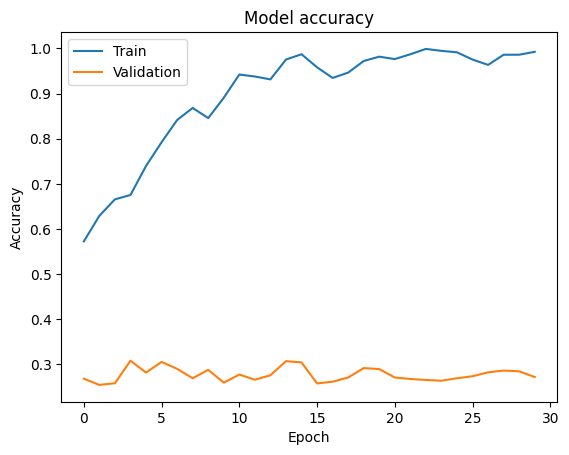

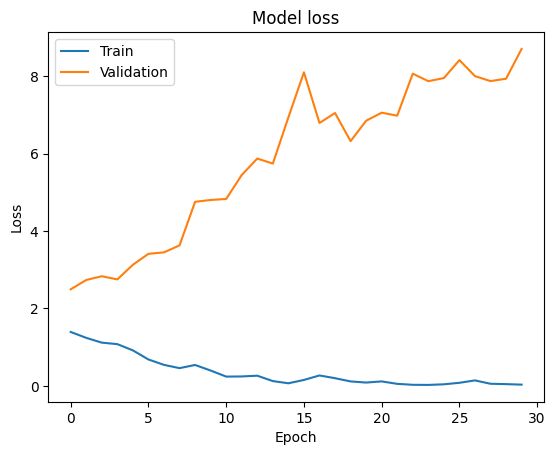

In [33]:
# Plot training & validation accuracy values
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Model Two**

In [35]:
model_2 = build_cnn_model_1(input_shape=input_shape, num_classes=num_classes)

c:\Users\thato\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
history_2 = model_2.fit(X_train_expanded, y_train_one_hot, 
                    epochs=30, 
                    batch_size=32, 
                    validation_data=(X_val_expanded, y_val_one_hot))

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 295ms/step - accuracy: 0.0335 - loss: 21.9283 - val_accuracy: 0.0417 - val_loss: 3.0254
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.0553 - loss: 3.0045 - val_accuracy: 0.0477 - val_loss: 2.9916
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.1237 - loss: 2.9871 - val_accuracy: 0.0417 - val_loss: 2.9998
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.1250 - loss: 2.9871 - val_accuracy: 0.0417 - val_loss: 3.0017
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.1149 - loss: 2.9850 - val_accuracy: 0.0417 - val_loss: 3.0036
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.1175 - loss: 2.9833 - val_accuracy: 0.0417 - val_loss: 3.0053
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.1121 - loss: 2.9805 - val_accuracy: 0.0417 - val_loss: 3.0072
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step - accuracy: 0.1052 - loss: 2.9779 - val_accuracy: 

In [44]:
# Evaluate model on validation set
val_loss, val_accuracy = model_2.evaluate(X_val_expanded, y_val_one_hot)
print(f"Validation Accuracy: {val_accuracy}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.0447 - loss: 3.0526
Validation Accuracy: 0.0416666679084301


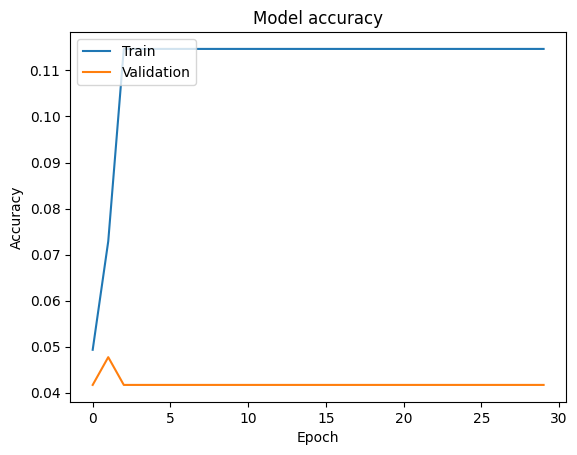

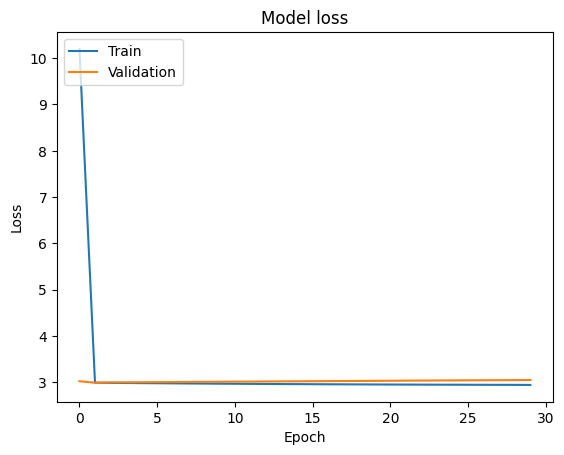

In [45]:
# Plot training & validation accuracy values
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Model Three**

In [47]:
model_3 = build_cnn_model_2(input_shape=input_shape, num_classes=num_classes)
history_3 = model_3.fit(X_train_expanded, y_train_one_hot, 
                    epochs=30, 
                    batch_size=32, 
                    validation_data=(X_val_expanded, y_val_one_hot))

c:\Users\thato\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 292ms/step - accuracy: 0.0558 - loss: 9.9317 - val_accuracy: 0.0471 - val_loss: 3.0030
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.0933 - loss: 2.9386 - val_accuracy: 0.0702 - val_loss: 4.1066
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.1961 - loss: 2.7793 - val_accuracy: 0.1979 - val_loss: 2.6202
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.2682 - loss: 2.5136 - val_accuracy: 0.2155 - val_loss: 2.4990
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.2950 - loss: 2.2424 - val_accuracy: 0.2166 - val_loss: 2.4574
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - accuracy: 0.3571 - loss: 1.9786 - val_accuracy: 0.2122 - val_loss: 2.4639
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - accuracy: 0.3911 - loss: 1.8744 - val_accuracy: 0.2374 - val_loss: 2.4240
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.3758 - loss: 1.8949 - val_accuracy: 0

In [48]:
# Evaluate model on validation set
val_loss, val_accuracy = model_3.evaluate(X_val_expanded, y_val_one_hot)
print(f"Validation Accuracy: {val_accuracy}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.2923 - loss: 4.9666
Validation Accuracy: 0.29495614767074585


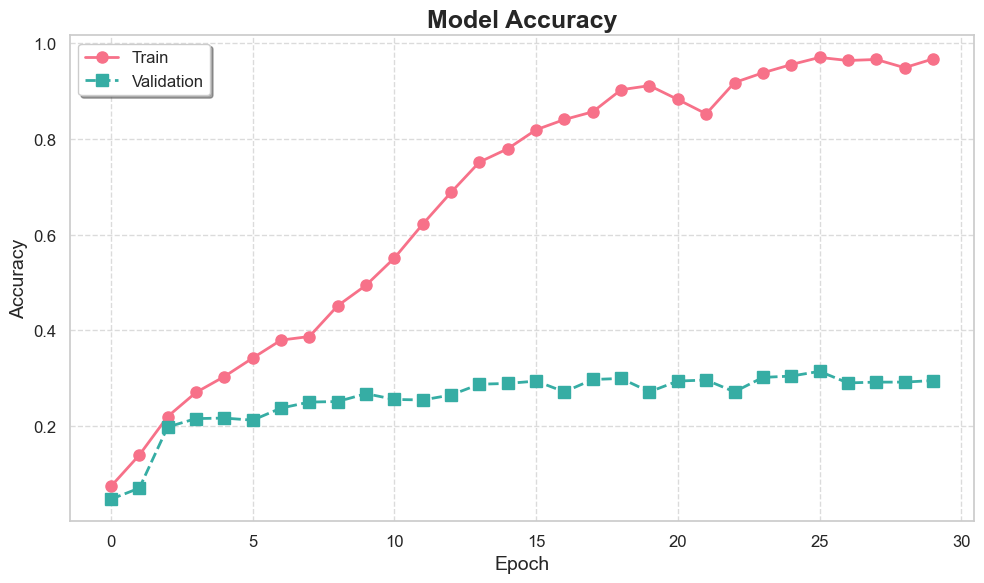

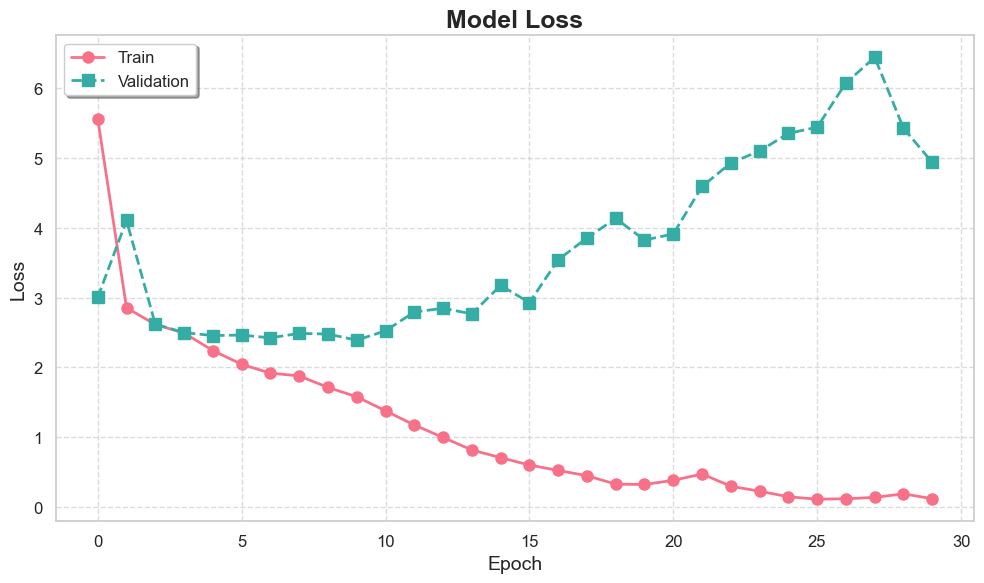

In [49]:
# Set up Seaborn style for cleaner, more attractive plots
sns.set(style="whitegrid")

# Define a color palette for consistency
colors = sns.color_palette("husl", 2)  # Use Husl palette with two colors

# Increase figure size for better readability
plt.figure(figsize=(10, 6))

# Plot training & validation accuracy values
plt.plot(history_3.history['accuracy'], color=colors[0], linestyle='-', marker='o', linewidth=2, markersize=8)
plt.plot(history_3.history['val_accuracy'], color=colors[1], linestyle='--', marker='s', linewidth=2, markersize=8)
plt.title('Model Accuracy', fontsize=18, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Increase figure size for better readability
plt.figure(figsize=(10, 6))

# Plot training & validation loss values
plt.plot(history_3.history['loss'], color=colors[0], linestyle='-', marker='o', linewidth=2, markersize=8)
plt.plot(history_3.history['val_loss'], color=colors[1], linestyle='--', marker='s', linewidth=2, markersize=8)
plt.title('Model Loss', fontsize=18, fontweight='bold')
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Model Four**

In [52]:
model_4 = build_cnn_model_3(input_shape=input_shape, num_classes=num_classes)
history_4 = model_4.fit(X_train_expanded, y_train_one_hot, 
                    epochs=30, 
                    batch_size=32, 
                    validation_data=(X_val_expanded, y_val_one_hot))

c:\Users\thato\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 430ms/step - accuracy: 0.0862 - loss: 17.2457 - val_accuracy: 0.0406 - val_loss: 17.3698
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 408ms/step - accuracy: 0.1217 - loss: 12.2250 - val_accuracy: 0.1014 - val_loss: 10.6245
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 410ms/step - accuracy: 0.1715 - loss: 10.4215 - val_accuracy: 0.0630 - val_loss: 9.7892
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 408ms/step - accuracy: 0.1509 - loss: 9.4766 - val_accuracy: 0.0559 - val_loss: 8.9265
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 408ms/step - accuracy: 0.1789 - loss: 8.4852 - val_accuracy: 0.0345 - val_loss: 8.1051
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 406ms/step - accuracy: 0.2058 - loss: 7.7735 - val_accuracy: 0.0214 - val_loss: 7.6858
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 402ms/step - accuracy: 0.1534 - loss: 7.1206 - val_accuracy: 0.0323 - val_loss: 6.9188
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 406ms/step - accuracy: 0.2054 - loss: 6.6442 - val

In [55]:
# Evaluate model on validation set
val_loss, val_accuracy = model_4.evaluate(X_val_expanded, y_val_one_hot)
print(f"Validation Accuracy: {val_accuracy}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.2124 - loss: 5.2576
Validation Accuracy: 0.20997807383537292


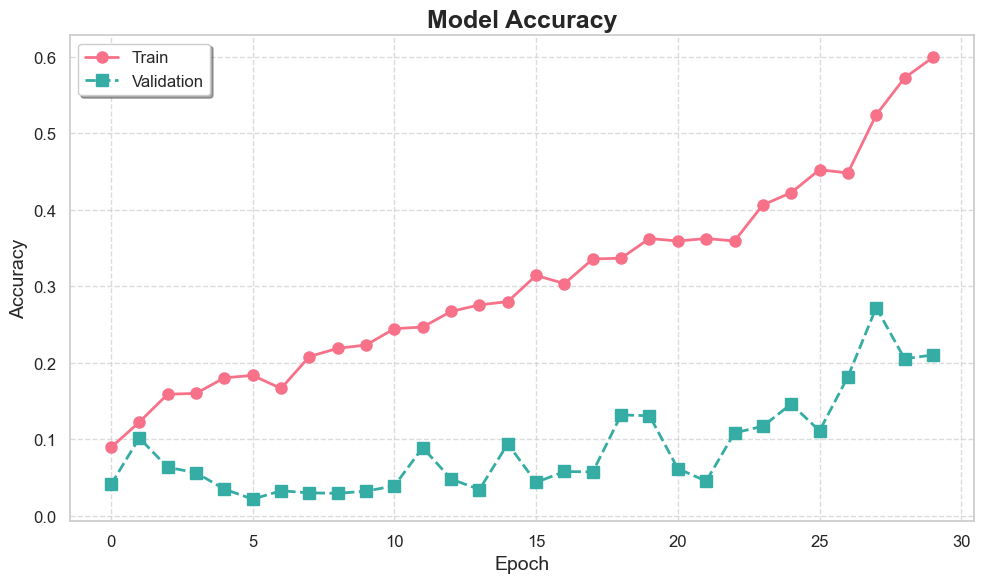

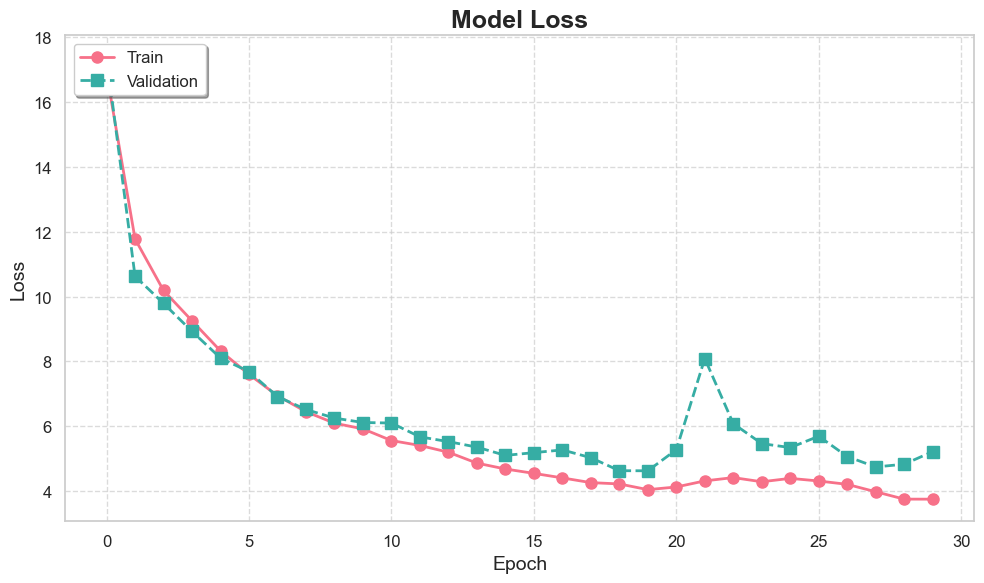

In [57]:
# Set up Seaborn style for cleaner, more attractive plots
sns.set(style="whitegrid")

# Define a color palette for consistency
colors = sns.color_palette("husl", 2)  # Use Husl palette with two colors

# Increase figure size for better readability
plt.figure(figsize=(10, 6))

# Plot training & validation accuracy values
plt.plot(history_4.history['accuracy'], color=colors[0], linestyle='-', marker='o', linewidth=2, markersize=8)
plt.plot(history_4.history['val_accuracy'], color=colors[1], linestyle='--', marker='s', linewidth=2, markersize=8)
plt.title('Model Accuracy', fontsize=18, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Increase figure size for better readability
plt.figure(figsize=(10, 6))

# Plot training & validation loss values
plt.plot(history_4.history['loss'], color=colors[0], linestyle='-', marker='o', linewidth=2, markersize=8)
plt.plot(history_4.history['val_loss'], color=colors[1], linestyle='--', marker='s', linewidth=2, markersize=8)
plt.title('Model Loss', fontsize=18, fontweight='bold')
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **What I Learned**

- I learned that the first model actually performs the best, though it has the most overfitting as seen by the high training accuracy. 
- Dropout @ 0.5 - Very low accuracy because it drops a lot of the data. Sure, it helped with preventing overfitting, but costed accuracy
- Dropout @ 0.3 - Accuracy improved because it refrains from dropping a lot of data. It helped with preventing overfitting and is the best performing out the bunch
- Added batch normalization, more dense layers with more dropout - Accuracy decreased. I think its because of the dropout layers that prevented it from learning key features

Overall, this doesnt work well at all. It feels as if the models are just reaching for the stars when they train.

In [59]:
model.save('Models/stage_1_cnn_model_1.keras')
model_2.save('Models/stage_1_cnn_model_2.keras')
model_3.save('Models/stage_1_cnn_model_3.keras')
model_4.save('Models/stage_1_cnn_model_4.keras')